/Users/cristiandulcey/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


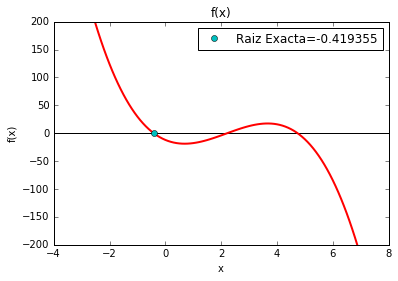

|      Raiz | Er porc verd    | Eaprox             |
|----------:|:----------------|:-------------------|
| -0.287425 | 31.4601829713 % | ----- %            |
| -0.379449 | 9.51606378962 % | 24.2519502364 %    |
| -0.405232 | 3.36776109117 % | 6.36257916392 %    |
| -0.412173 | 1.71256344116 % | 1.68403786686 %    |
| -0.414022 | 1.27182454032 % | 0.446416535893 %   |
| -0.414512 | 1.15481059907 % | 0.118381017798 %   |
| -0.414642 | 1.12376823806 % | 0.0313951699501 %  |
| -0.414677 | 1.11553478731 % | 0.00832633390661 % |


In [1]:
import math
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline

true=-0.419355
valores,funcion,raices, tabla, Eaprox=[],[],[],[],[]
x=-4
f1,f2,f3=1.0,1.0,1.0
xl, xu, xr=-1.0,0.0,0.0
Es=0.01

while(x<=7):
    fx=-12-21*x+18*math.pow(x,2)-2.75*math.pow(x,3)
    valores.append(x)
    funcion.append(fx)
    x+=0.1

def metodo1(x):
    fx=-12-21*x+18*math.pow(x,2)-2.75*math.pow(x,3)
    return fx

b=0
while 1:
    f1=metodo1(xl)
    f2=metodo1(xu)
    xr=xu-(f2*(xl-xu))/(f1-f2)
    raices.append(xr)
    f3=metodo1(xr)
    erpv=math.fabs(((true-xr)/true)*100)
    if(b==0):
        Eaprox.append("-----")
        eaprx=100
    else:
        k=b-1
        eaprx=math.fabs(((raices[b]-raices[k])/raices[b])*100)
        Eaprox.append(eaprx)
    tabla.append([xr, str(erpv)+" %", str(Eaprox[b])+" %"])
    if ((f1*f3)<0):
        xu=xr
    if((f1*f3)>0):
         xl=xr
    if(eaprx<Es):
        break    
    b+=1    

plt.title("f(x)")
plt.axis([-4, 8, -200, 200])
plt.ylabel('f(x)')
plt.xlabel('x')
plt.axhline(0, color="black")
plt.plot(valores, funcion, 'r-', linewidth=2)
plt.plot(true,0, 'co', label='Raiz Exacta=-0.419355')
plt.legend(loc = 'upper right', numpoints = 1)
plt.show()

print tabulate(tabla, headers=["Raiz","Er porc verd","Eaprox"], tablefmt="pipe")